<a href="https://colab.research.google.com/github/PapiCamiloRu08/PROGCOM-A/blob/main/GQ3_MEJORA_II_CORTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tkinter as tk
from tkinter import messagebox, filedialog
import matplotlib.pyplot as plt
import pandas as pd

# Función para calcular interés compuesto
def rs_IC(capital, tasa, tiempo, n):
    valor_futuro = capital * (1 + tasa / n) ** (n * tiempo)
    interes = valor_futuro - capital
    return interes, valor_futuro

# Función para generar la gráfica
def rs_graficar(capital, tasa, tiempo, n):
    periodos = list(range(1, tiempo * n + 1))
    valores = [capital * (1 + tasa / n) ** i for i in periodos]
    plt.plot(periodos, valores, marker='o')
    plt.title('Crecimiento del Capital con Interés Compuesto')
    plt.xlabel('Períodos de capitalización')
    plt.ylabel('Valor acumulado ($)')
    plt.grid(True)
    plt.show()

# Función para guardar los resultados en Excel
def rs_guardar_excel(capital, tasa, tiempo, n, interes, valor_futuro):
    archivo = filedialog.asksaveasfilename(defaultextension=".xlsx", filetypes=[("Archivos Excel", "*.xlsx")])
    if archivo:
        periodos = list(range(1, tiempo * n + 1))
        valores = [capital * (1 + tasa / n) ** i for i in periodos]
        datos = pd.DataFrame({
            'Periodo': periodos,
            'Valor acumulado ($)': valores
        })
        datos.loc[len(datos)] = ['Total', valor_futuro]
        datos.to_excel(archivo, index=False)
        messagebox.showinfo("Éxito", f"Archivo guardado en: {archivo}")

# Función principal del programa
def rs_calcular():
    try:
        capital = float(entry_capital.get())
        tasa = float(entry_tasa.get()) / 100
        tiempo = int(entry_tiempo.get())
        n = int(entry_n.get())

        interes, valor_futuro = rs_IC(capital, tasa, tiempo, n)

        label_resultado.config(text=f"Interés generado: ${interes:.2f}\nValor futuro: ${valor_futuro:.2f}")
        rs_graficar(capital, tasa, tiempo, n)

        guardar = messagebox.askyesno("Guardar", "¿Desea guardar los resultados en Excel?")
        if guardar:
            rs_guardar_excel(capital, tasa, tiempo, n, interes, valor_futuro)

    except ValueError:
        messagebox.showerror("Error", "Por favor ingrese valores numéricos válidos.")

# Interfaz gráfica con Tkinter
ventana = tk.Tk()
ventana.title("Calculadora de Interés Compuesto")
ventana.geometry("400x400")

# Entradas
tk.Label(ventana, text="Capital inicial ($):").pack()
entry_capital = tk.Entry(ventana)
entry_capital.pack()

tk.Label(ventana, text="Tasa de interés anual (%):").pack()
entry_tasa = tk.Entry(ventana)
entry_tasa.pack()

tk.Label(ventana, text="Tiempo (años):").pack()
entry_tiempo = tk.Entry(ventana)
entry_tiempo.pack()

tk.Label(ventana, text="Capitalizaciones por año (n):").pack()
entry_n = tk.Entry(ventana)
entry_n.pack()

# Botón de cálculo
tk.Button(ventana, text="Calcular", command=rs_calcular, bg="lightblue").pack(pady=10)

# Resultado
label_resultado = tk.Label(ventana, text="")
label_resultado.pack(pady=10)

ventana.mainloop()


TclError: no display name and no $DISPLAY environment variable

1

Calculadora de Interés Compuesto (sin interfaz gráfica)
Ingrese el capital inicial: 200000
Ingrese la tasa de interés anual (%): 3
Ingrese el tiempo (en años): 5
Ingrese el número de veces que se capitaliza el interés por año: 4

Interés generado: $32236.83
Valor futuro (Capital + Interés): $232236.83


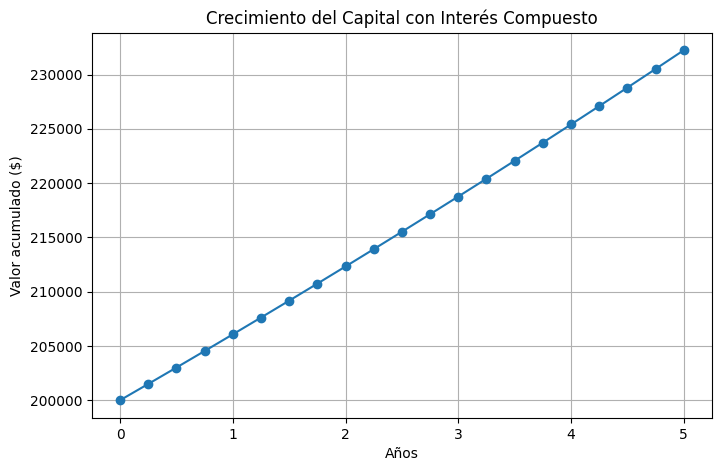


Datos guardados en el archivo: interes_compuesto.xlsx


In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Función de interés compuesto
def IC(capital, tasa, tiempo, n):
    """
    Calcula el interés compuesto y el valor futuro.
    capital: capital inicial
    tasa: tasa de interés anual en forma decimal (ej. 0.08 para 8%)
    tiempo: tiempo en años
    n: número de capitalizaciones por año
    """
    valor_futuro = capital * (1 + tasa / n) ** (n * tiempo)
    interes = valor_futuro - capital
    return interes, valor_futuro

# Entrada de datos en consola
print("Calculadora de Interés Compuesto (sin interfaz gráfica)")
P = float(input("Ingrese el capital inicial: "))
r = float(input("Ingrese la tasa de interés anual (%): ")) / 100
t = float(input("Ingrese el tiempo (en años): "))
n = int(input("Ingrese el número de veces que se capitaliza el interés por año: "))

interes, valor_futuro = IC(P, r, t, n)

# Mostrar resultados
print(f"\nInterés generado: ${interes:.2f}")
print(f"Valor futuro (Capital + Interés): ${valor_futuro:.2f}")

# Generar datos para la gráfica
años = [i/n for i in range(int(n*t)+1)]
valores = [P * (1 + r/n) ** (n * i) for i in años]

# Graficar
plt.figure(figsize=(8,5))
plt.plot(años, valores, marker='o')
plt.title('Crecimiento del Capital con Interés Compuesto')
plt.xlabel('Años')
plt.ylabel('Valor acumulado ($)')
plt.grid(True)
plt.show()

# Guardar datos en Excel
df = pd.DataFrame({'Tiempo (años)': años, 'Valor acumulado ($)': valores})
archivo = 'interes_compuesto.xlsx'
df.to_excel(archivo, index=False)
print(f"\nDatos guardados en el archivo: {archivo}")